In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
import random
from sklearn.utils import shuffle
from scipy import stats
import pylab
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from boruta import BorutaPy
from sklearn.metrics import classification_report
from sklearn.svm import SVC
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = 15,10

In [2]:
## importing the xls file

In [3]:
xls = pd.ExcelFile("Interview Assessment Data Engineer.xlsx")
df_patient_details = pd.read_excel(xls, 'T#1 - Patient Details')
df_causative_details = pd.read_excel(xls, 'T#2 - Causative Factors')
df_heart_disease_presence = pd.read_excel(xls, 'T#3 - Heart Disease Presence')

In [4]:
df_patient_details.head()

,Patient ID,Age,Sex
0,1001,40,M
1,1002,49,F
2,1003,37,M
3,1004,48,F
4,1005,54,M


In [5]:
df_patient_details.shape

(918, 3)

In [6]:
df_causative_details.head()

,Patient ID,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,1830,ATA,130.0,204,0,LVH,202.0,N,0.0,Up
1,1760,ATA,192.0,283,0,LVH,195.0,N,0.0,Up
2,1796,NAP,120.0,240,1,Normal,194.0,N,0.8,Down
3,1754,ATA,118.0,210,0,Normal,192.0,N,0.7,Up
4,1127,ATA,130.0,161,0,Normal,190.0,N,0.0,Up


In [7]:
df_causative_details.shape

(918, 10)

In [16]:
df_heart_disease_presence.tail()

,Patient ID,HeartDisease
913,1914,1
914,1915,1
915,1916,1
916,1917,1
917,1918,0


In [9]:
df_heart_disease_presence.shape

(918, 2)

In [10]:
df_causative_details.isnull().sum()

Patient ID        0
ChestPainType     0
RestingBP         6
Cholesterol       0
FastingBS         0
RestingECG        5
MaxHR             8
ExerciseAngina    2
Oldpeak           0
ST_Slope          1
dtype: int64

#### question 1

In [11]:
## merge all 3 tables by keeping the second table as left most 
### so it's not sorted

In [12]:
df_patients_info = df_causative_details.merge(df_patient_details,on='Patient ID').merge(df_heart_disease_presence,on='Patient ID')

In [13]:
df_patients_info.head()

,Patient ID,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,Sex,HeartDisease
0,1830,ATA,130.0,204,0,LVH,202.0,N,0.0,Up,29,M,0
1,1760,ATA,192.0,283,0,LVH,195.0,N,0.0,Up,54,M,1
2,1796,NAP,120.0,240,1,Normal,194.0,N,0.8,Down,42,M,0
3,1754,ATA,118.0,210,0,Normal,192.0,N,0.7,Up,34,F,0
4,1127,ATA,130.0,161,0,Normal,190.0,N,0.0,Up,34,F,0


In [14]:
df_patients_info.shape

(918, 13)

In [15]:
## checking for missing values

In [16]:
df_patients_info.isnull().sum()

Patient ID        0
ChestPainType     0
RestingBP         6
Cholesterol       0
FastingBS         0
RestingECG        5
MaxHR             8
ExerciseAngina    2
Oldpeak           0
ST_Slope          1
Age               0
Sex               0
HeartDisease      0
dtype: int64

In [17]:
## RestingBP, RestingECG, MaxHR, ExerciseAngina, ST_Slope

In [18]:
df_patients_info[df_patients_info['RestingECG'].isna()]

,Patient ID,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,Sex,HeartDisease
266,1642,ASY,138.0,243,0,NaN,152.0,Y,0.0,Flat,46,F,0
435,1227,NAP,120.0,195,0,NaN,140.0,N,0.0,Up,53,M,0
491,1072,ATA,130.0,215,0,NaN,135.0,N,0.0,Up,44,M,0
549,1898,ASY,128.0,205,0,NaN,130.0,Y,2.0,Flat,55,F,1
681,1515,ASY,122.0,0,0,NaN,120.0,N,0.5,Up,43,M,1


In [19]:
df_patients_info.dtypes[df_patients_info.dtypes != "object"].index

Index(['Patient ID', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'Age', 'HeartDisease'],
      dtype='object')

In [20]:
df_patients_info.dtypes[df_patients_info.dtypes == "object"].index

Index(['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex'], dtype='object')

#### question 2 - impute by mode for categorical column

In [22]:
cat_cols = ["RestingECG", "ExerciseAngina", "ST_Slope"]
df_patients_info[cat_cols] = df_patients_info[cat_cols].fillna(df_patients_info.mode().iloc[0])

In [24]:
df_patients_info.describe()

,Patient ID,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Age,HeartDisease
count,918.000000,912.000000,918.000000,918.000000,910.000000,918.000000,918.000000,918.000000
mean,1459.500000,132.414474,198.799564,0.233115,136.808791,0.887364,53.510893,0.553377
std,265.148072,18.513214,109.384145,0.423046,25.454347,1.066570,9.432617,0.497414
min,1001.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,28.000000,0.000000
25%,1230.250000,120.000000,173.250000,0.000000,120.000000,0.000000,47.000000,0.000000
50%,1459.500000,130.000000,223.000000,0.000000,138.000000,0.600000,54.000000,1.000000
75%,1688.750000,140.000000,267.000000,0.000000,155.750000,1.500000,60.000000,1.000000
max,1918.000000,200.000000,603.000000,1.000000,202.000000,6.200000,77.000000,1.000000


#### question 2 - impute by median for numeric columns

In [26]:
num_cols = ["RestingBP", "MaxHR"]
df_patients_info[num_cols] = df_patients_info[num_cols].fillna(df_patients_info.median())

In [27]:
df_patients_info.isnull().sum()

Patient ID        0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Age               0
Sex               0
HeartDisease      0
dtype: int64

#### question 3 - visualize type of chest pain type

In [28]:
## group the ages accordingly 

In [29]:
def age_buckets(x):
    if int(x) in range (0, 18): return 'kids and teenagers' 
    if int(x) in range (18, 24): return 'college / young adults'
    if int(x) in range (24, 36): return 'adults / young workers'
    if int(x) in range (36, 51): return 'middle aged'
    if int(x) in range (51, 66): return 'senior mid aged'
    if x > 65: return 'retirees / senior citizen'
    else: return 'none'

In [30]:
df_patients_info['life_stage'] = df_patients_info.Age.apply(age_buckets)

In [34]:
df_patients_info.head(2)

,Patient ID,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,Sex,HeartDisease,life_stage
0,1830,ATA,130.0,204,0,LVH,202.0,N,0.0,Up,29,M,0,adults / young workers
1,1760,ATA,192.0,283,0,LVH,195.0,N,0.0,Up,54,M,1,senior mid aged


In [35]:
df_patients_info['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Count')

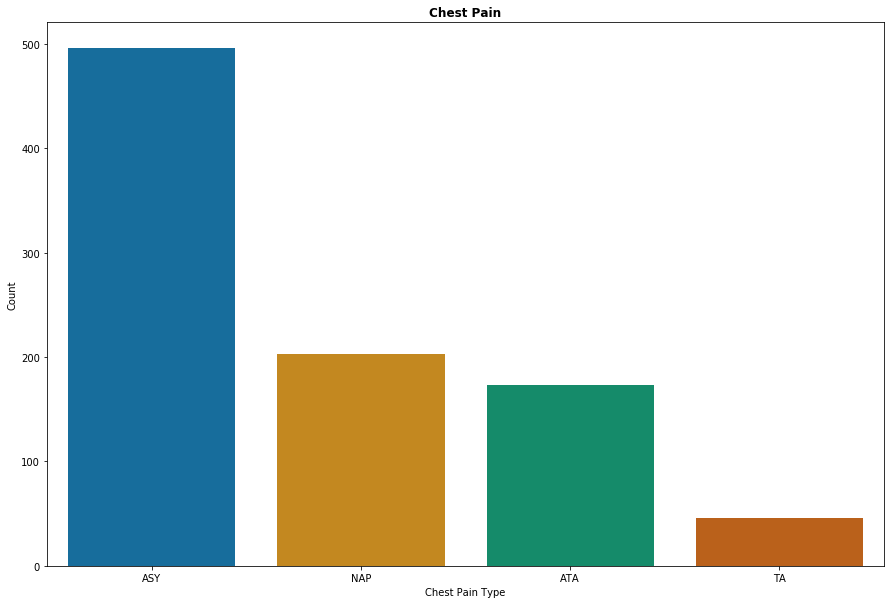

In [36]:
sns.countplot(x='ChestPainType', data=df_patients_info,order=pd.value_counts(df_patients_info['ChestPainType']).index,palette= 'colorblind')
plt.title('Chest Pain', weight='bold')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

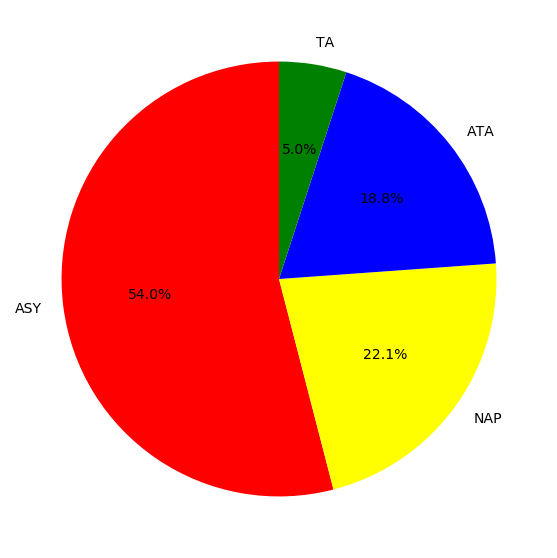

In [39]:
# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df_patients_info['ChestPainType'].value_counts().index.tolist()

# Convert value counts to list
sizes = df_patients_info['ChestPainType'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0, 0, 0)

# Determine colour of pie chart
colors = ['red', 'yellow', 'blue', 'green']

plt.pie(sizes, explode= explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

In [40]:
ordered_life_stage = ["adults / young workers", "middle aged", "senior mid aged", "retirees / senior citizen"]

Text(0, 0.5, 'Count')

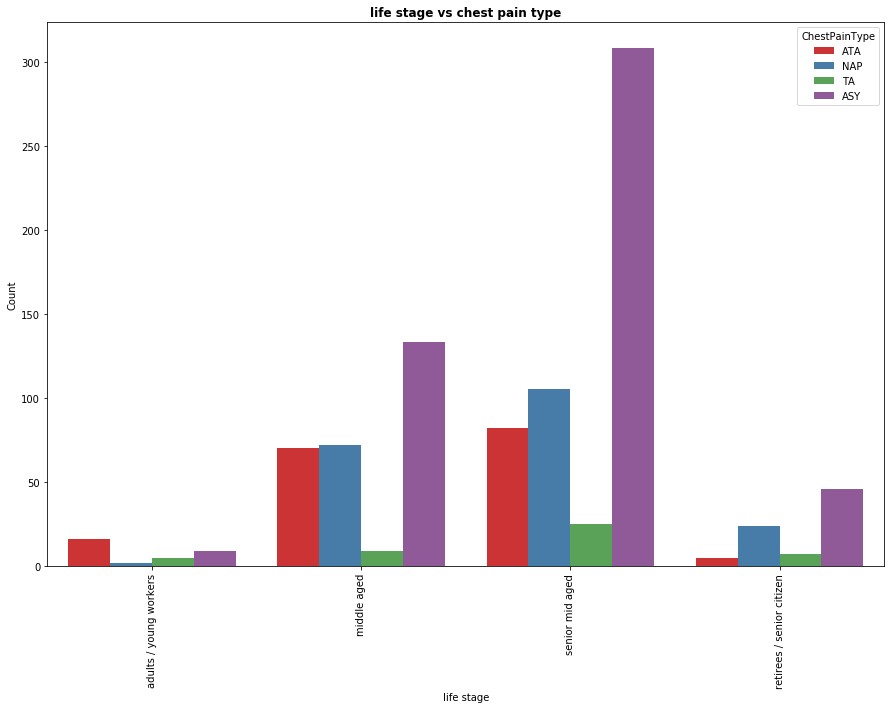

In [41]:
sns.countplot(x='life_stage', data = df_patients_info, palette= 'Set1', hue='ChestPainType', order=ordered_life_stage)
plt.title('life stage vs chest pain type', weight='bold')
plt.xlabel('life stage')
plt.xticks(rotation=90)
plt.ylabel('Count')

In [42]:
df_patients_info.life_stage.value_counts()

senior mid aged              520
middle aged                  284
retirees / senior citizen     82
adults / young workers        32
Name: life_stage, dtype: int64

In [ ]:
## ata - caused by an imbalance between the blood supply to the heart and oxygen needs of the heart muscle
## asy -  lack the intensity of a classic heart attack
## nap - muscle pain or broken rib

#### question 4 - Age vs Cholesterol

In [43]:
df_patients_info['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [ ]:
## chole level - https://www.emedicinehealth.com/understanding_your_cholesterol_level/article_em.htm

In [44]:
def chol_buckets(x):
    if int(x) in range (0, 200): return 'good'
    if int(x) in range (200, 240): return 'borderline risk'
    if x >= 240: return 'high risk'
    else: return 'none'

In [45]:
df_patients_info['chol_stage'] = df_patients_info.Cholesterol.apply(chol_buckets)

In [47]:
df_patients_info.head(3)

,Patient ID,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,Sex,HeartDisease,life_stage,chol_stage
0,1830,ATA,130.0,204,0,LVH,202.0,N,0.0,Up,29,M,0,adults / young workers,borderline risk
1,1760,ATA,192.0,283,0,LVH,195.0,N,0.0,Up,54,M,1,senior mid aged,high risk
2,1796,NAP,120.0,240,1,Normal,194.0,N,0.8,Down,42,M,0,middle aged,high risk


Text(0, 0.5, 'Count')

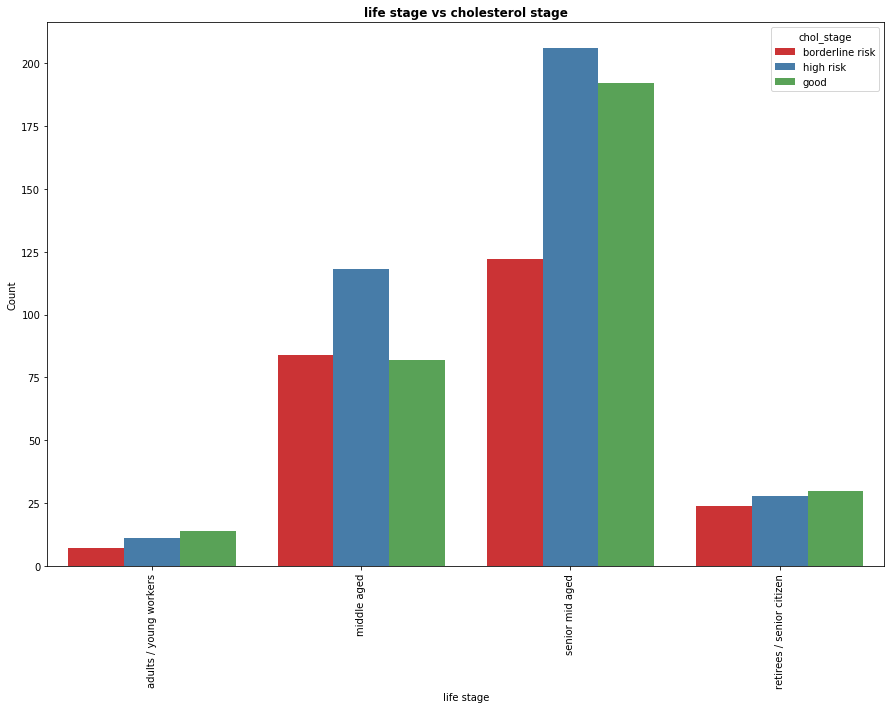

In [48]:
sns.countplot(x='life_stage', data = df_patients_info, palette= 'Set1', hue='chol_stage', order=ordered_life_stage)
plt.title('life stage vs cholesterol stage', weight='bold')
plt.xlabel('life stage')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

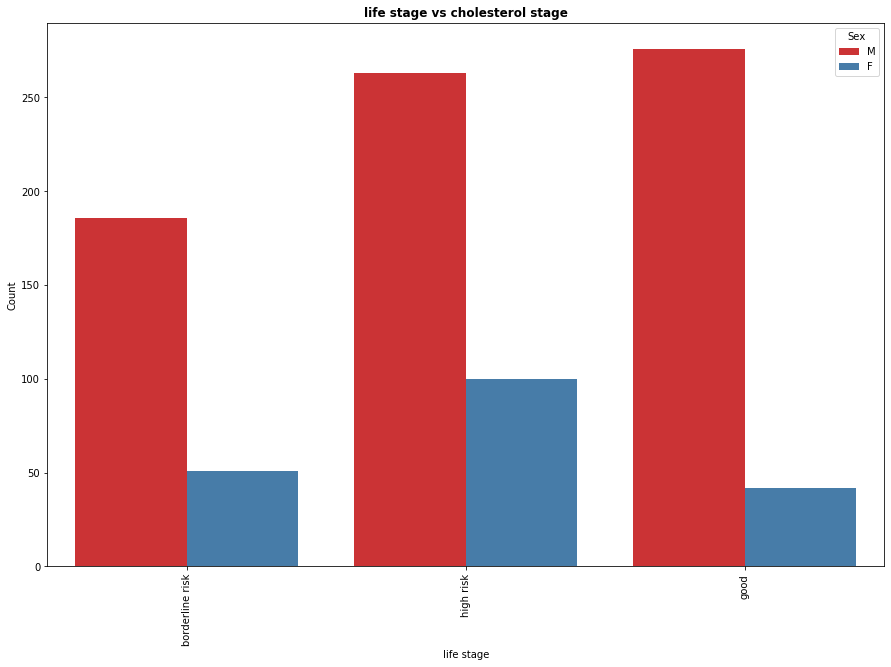

In [49]:
sns.countplot(x='chol_stage', data = df_patients_info, palette= 'Set1', hue='Sex')
plt.title('life stage vs cholesterol stage', weight='bold')
plt.xlabel('life stage')
plt.xticks(rotation=90)
plt.ylabel('Count')

#### question 5

In [51]:
df_patients_info.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [50]:
df_patients_info.head()

,Patient ID,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,Sex,HeartDisease,life_stage,chol_stage
0,1830,ATA,130.0,204,0,LVH,202.0,N,0.0,Up,29,M,0,adults / young workers,borderline risk
1,1760,ATA,192.0,283,0,LVH,195.0,N,0.0,Up,54,M,1,senior mid aged,high risk
2,1796,NAP,120.0,240,1,Normal,194.0,N,0.8,Down,42,M,0,middle aged,high risk
3,1754,ATA,118.0,210,0,Normal,192.0,N,0.7,Up,34,F,0,adults / young workers,borderline risk
4,1127,ATA,130.0,161,0,Normal,190.0,N,0.0,Up,34,F,0,adults / young workers,good


In [ ]:
## exercise angina is when the heart needs more blood during physical activity 

Text(0, 0.5, 'Count')

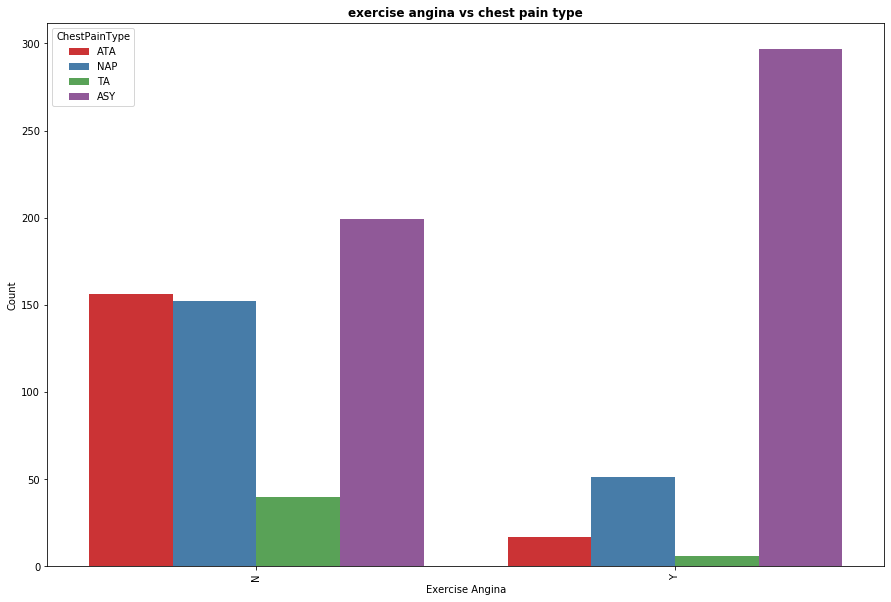

In [76]:
sns.countplot(x='ExerciseAngina', data = df_patients_info, palette= 'Set1', hue='ChestPainType')
plt.title('exercise angina vs chest pain type', weight='bold')
plt.xlabel('Exercise Angina')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

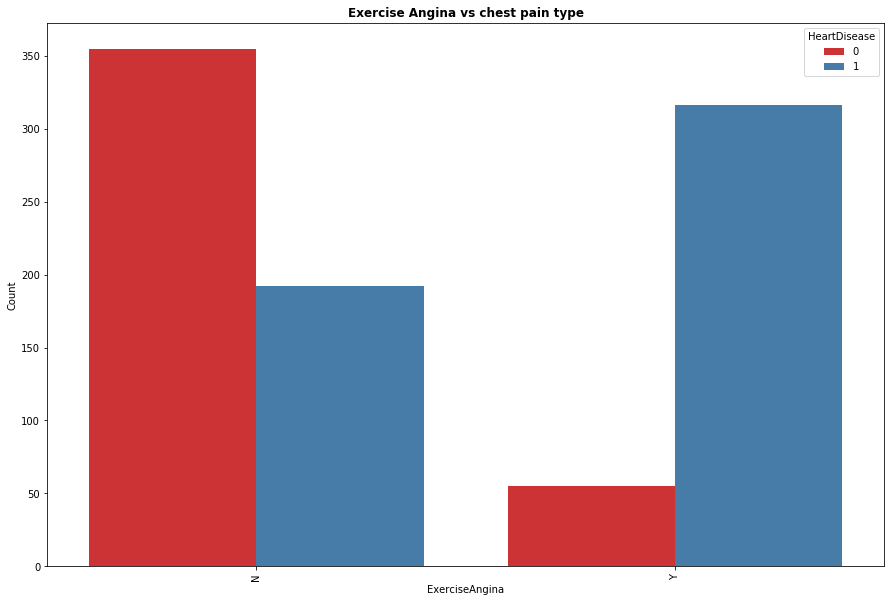

In [238]:
sns.countplot(x='ExerciseAngina', data = df_patients_info, palette= 'Set1', hue='HeartDisease')
plt.title('Exercise Angina vs chest pain type', weight='bold')
plt.xlabel('ExerciseAngina')
plt.xticks(rotation=90)
plt.ylabel('Count')

In [93]:
# sns.countplot(x='ExerciseAngina', data = df_patients_info, palette= 'Set1', hue='life_stage')
# plt.title('Heart Disease vs chest pain type', weight='bold')
# plt.xlabel('ExerciseAngina')
# plt.xticks(rotation=90)
# plt.ylabel('Count')

Text(0, 0.5, 'Count')

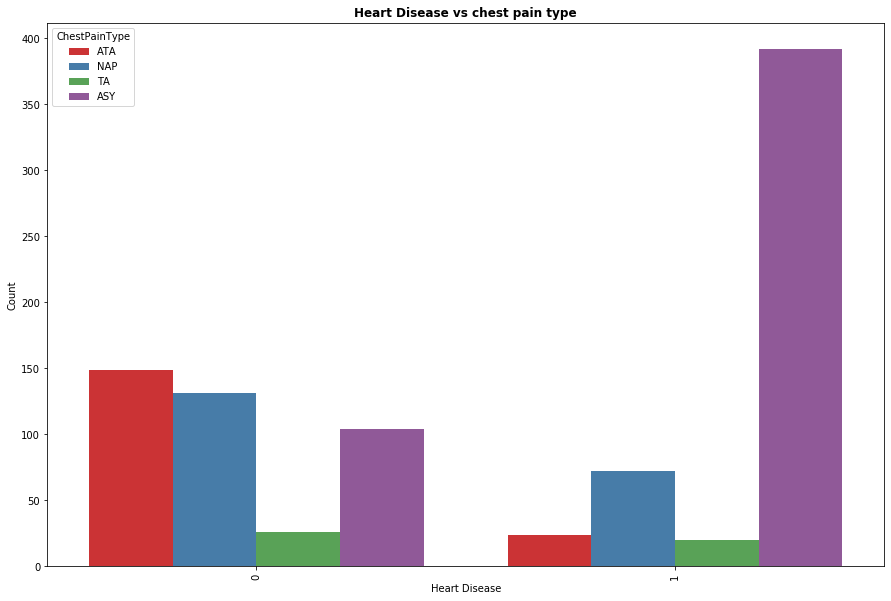

In [80]:
sns.countplot(x='HeartDisease', data = df_patients_info, palette= 'Set1', hue='ChestPainType')
plt.title('Heart Disease vs chest pain type', weight='bold')
plt.xlabel('Heart Disease')
plt.xticks(rotation=90)
plt.ylabel('Count')

#### fastingbs - fasting blood sugar

Text(0, 0.5, 'Count')

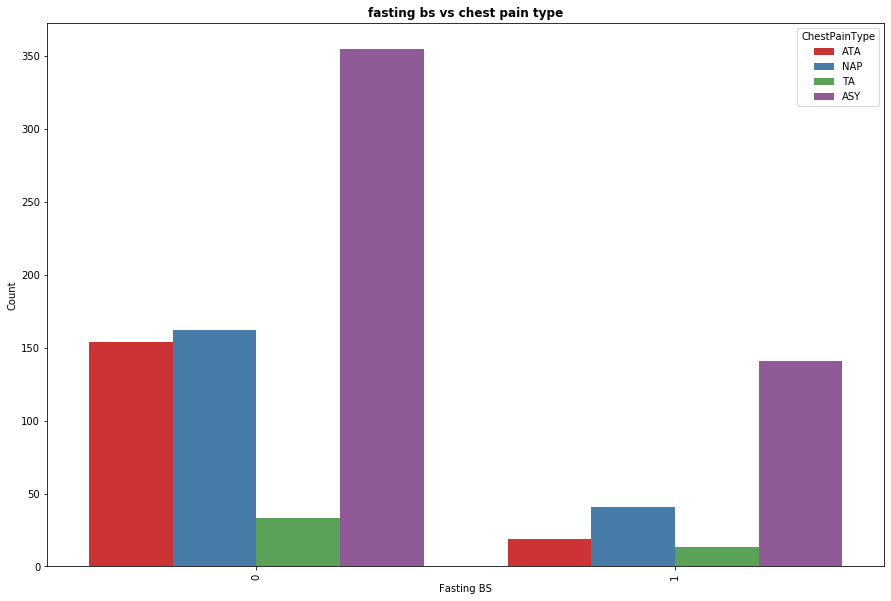

In [82]:
sns.countplot(x='FastingBS', data = df_patients_info, palette= 'Set1', hue='ChestPainType')
plt.title('fasting bs vs chest pain type', weight='bold')
plt.xlabel('Fasting BS')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

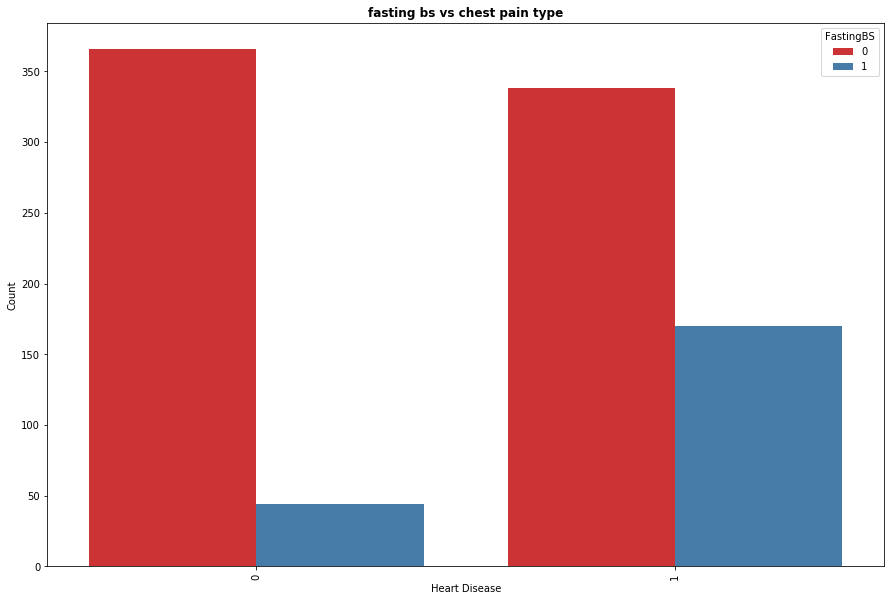

In [86]:
sns.countplot(x='HeartDisease', data = df_patients_info, palette= 'Set1', hue='FastingBS')
plt.title('fasting bs vs chest pain type', weight='bold')
plt.xlabel('Heart Disease')
plt.xticks(rotation=90)
plt.ylabel('Count')

In [ ]:
## cholesterol vs chest vs heart

Text(0, 0.5, 'Count')

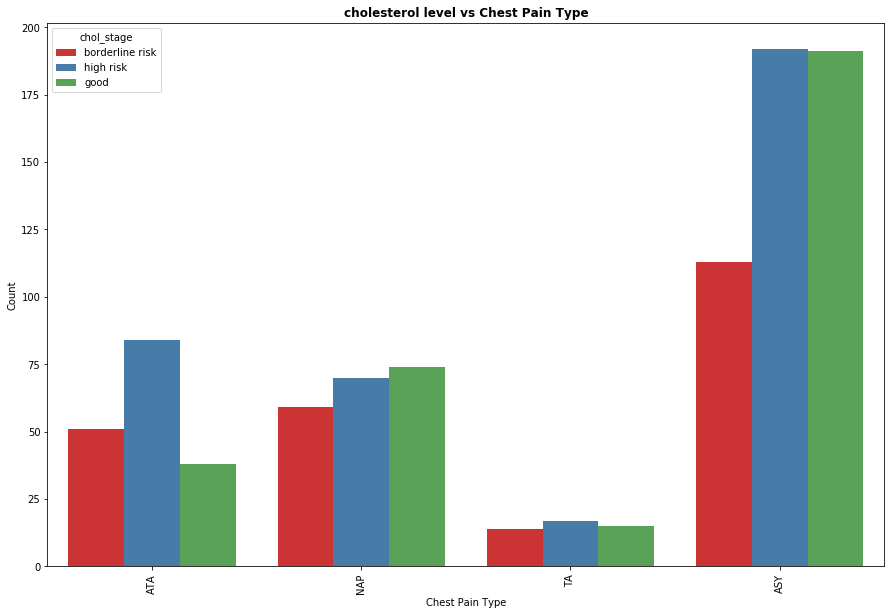

In [97]:
sns.countplot(x='ChestPainType', data = df_patients_info, palette= 'Set1', hue='chol_stage')
plt.title('cholesterol level vs Chest Pain Type', weight='bold')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

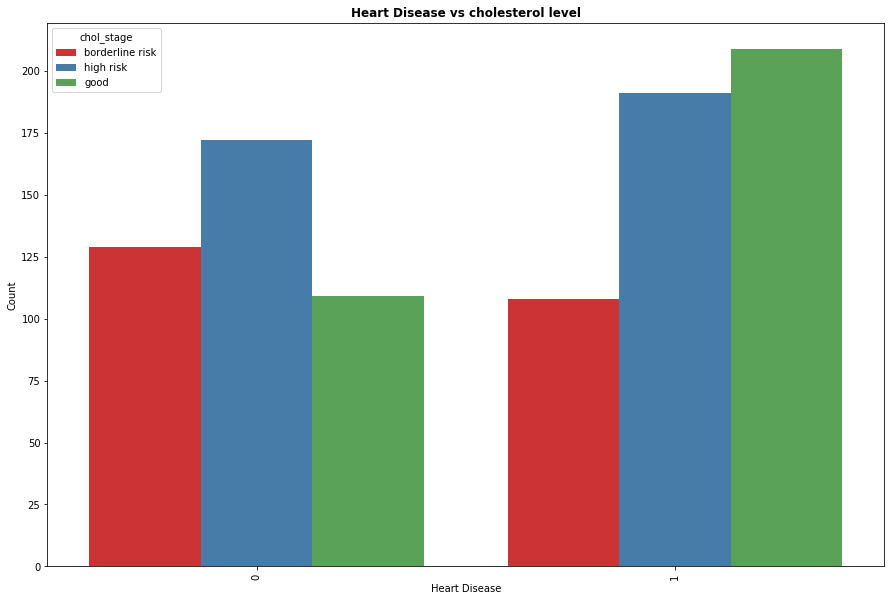

In [88]:
sns.countplot(x='HeartDisease', data = df_patients_info, palette= 'Set1', hue='chol_stage')
plt.title('Heart Disease vs cholesterol level', weight='bold')
plt.xlabel('Heart Disease')
plt.xticks(rotation=90)
plt.ylabel('Count')

In [ ]:
## st slope vs chest vs heart disease

Text(0, 0.5, 'Count')

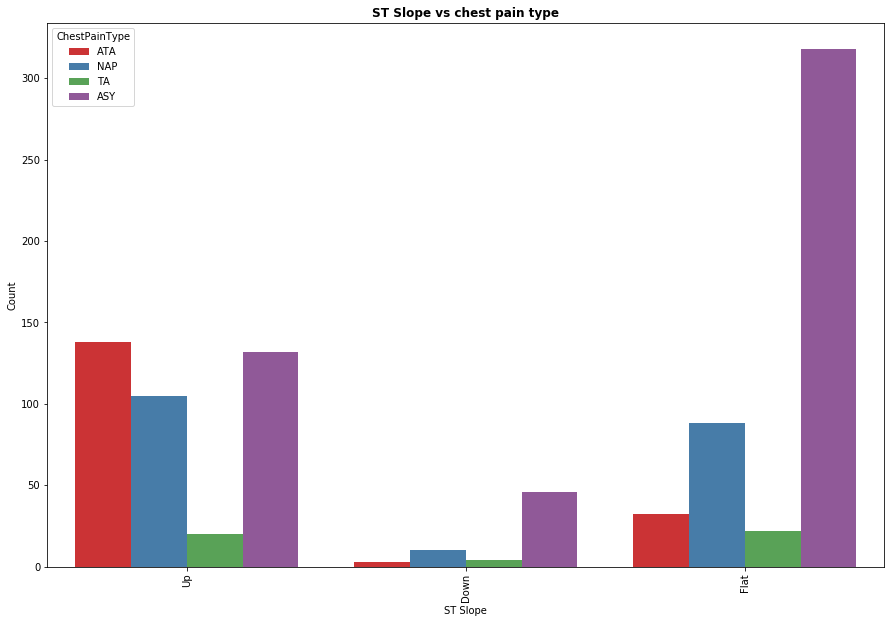

In [71]:
sns.countplot(x='ST_Slope', data = df_patients_info, palette= 'Set1', hue='ChestPainType')
plt.title('ST Slope vs chest pain type', weight='bold')
plt.xlabel('ST Slope')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

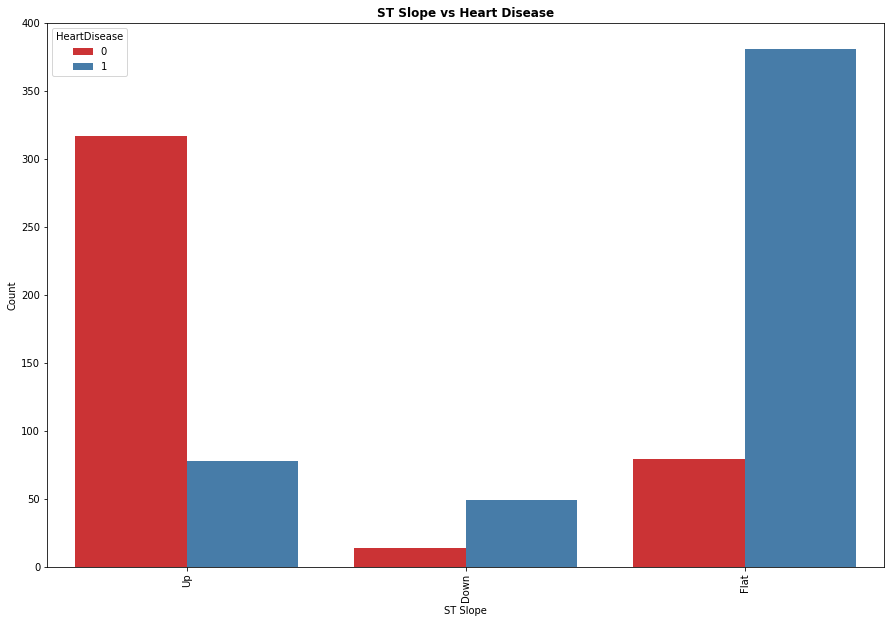

In [99]:
sns.countplot(x='ST_Slope', data = df_patients_info, palette= 'Set1', hue='HeartDisease')
plt.title('ST Slope vs Heart Disease', weight='bold')
plt.xlabel('ST Slope')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

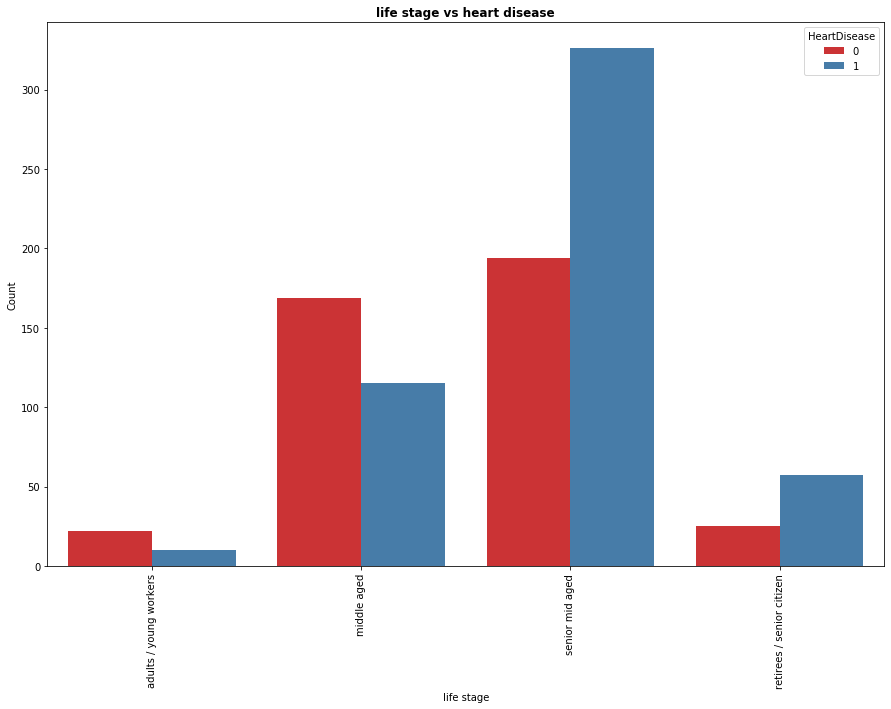

In [69]:
sns.countplot(x='life_stage', data = df_patients_info, palette= 'Set1', hue='HeartDisease', order=ordered_life_stage)
plt.title('life stage vs heart disease', weight='bold')
plt.xlabel('life stage')
plt.xticks(rotation=90)
plt.ylabel('Count')

## Machine learning

In [165]:
df_patients_info.head()

,Patient ID,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,Sex,HeartDisease,life_stage,chol_stage
0,1830,ATA,130.0,204,0,LVH,202.0,N,0.0,Up,29,M,0,adults / young workers,borderline risk
1,1760,ATA,192.0,283,0,LVH,195.0,N,0.0,Up,54,M,1,senior mid aged,high risk
2,1796,NAP,120.0,240,1,Normal,194.0,N,0.8,Down,42,M,0,middle aged,high risk
3,1754,ATA,118.0,210,0,Normal,192.0,N,0.7,Up,34,F,0,adults / young workers,borderline risk
4,1127,ATA,130.0,161,0,Normal,190.0,N,0.0,Up,34,F,0,adults / young workers,good


In [166]:
df_ml = df_patients_info.drop(['Patient ID', 'life_stage', 'chol_stage'], axis=1)

In [167]:
df_ml.head()

,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,Sex,HeartDisease
0,ATA,130.0,204,0,LVH,202.0,N,0.0,Up,29,M,0
1,ATA,192.0,283,0,LVH,195.0,N,0.0,Up,54,M,1
2,NAP,120.0,240,1,Normal,194.0,N,0.8,Down,42,M,0
3,ATA,118.0,210,0,Normal,192.0,N,0.7,Up,34,F,0
4,ATA,130.0,161,0,Normal,190.0,N,0.0,Up,34,F,0


In [168]:
X = df_ml.drop('HeartDisease',axis=1)
y = df_ml['HeartDisease']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [170]:
# check for class ratio between train and test
print (y_train.value_counts())
print (y_test.value_counts())

1    381
0    307
Name: HeartDisease, dtype: int64
1    127
0    103
Name: HeartDisease, dtype: int64


In [171]:
df_ml.columns

Index(['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Age', 'Sex',
       'HeartDisease'],
      dtype='object')

In [172]:
## check for outliers

In [173]:
df_ml_num = df_ml.select_dtypes(exclude=['object'])

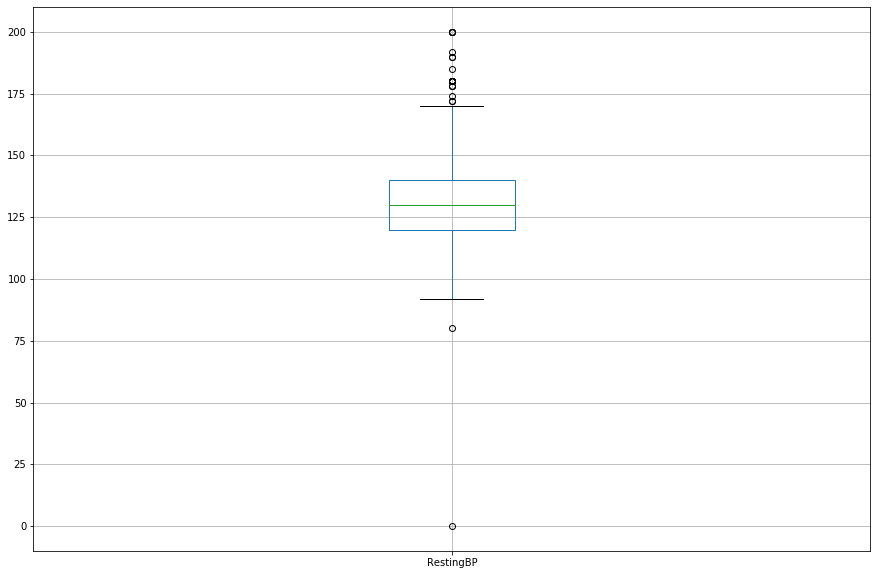

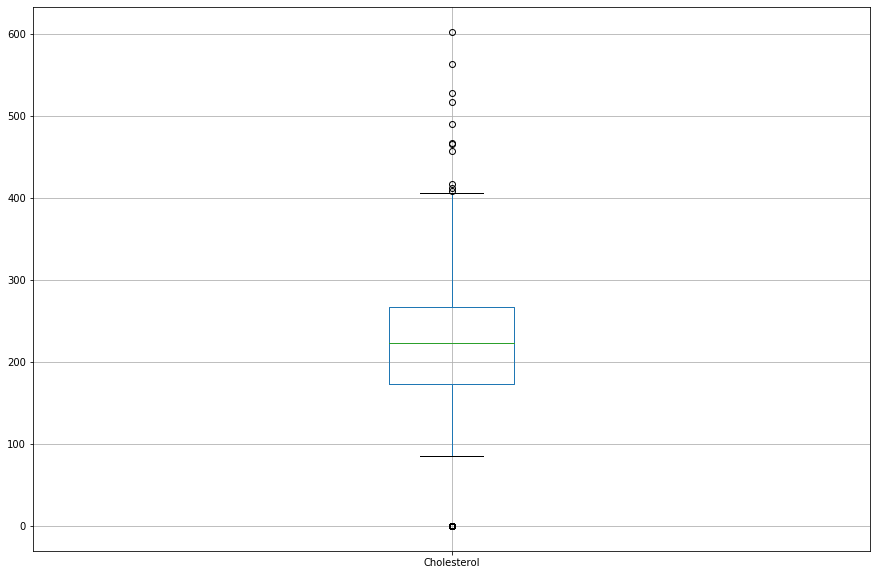

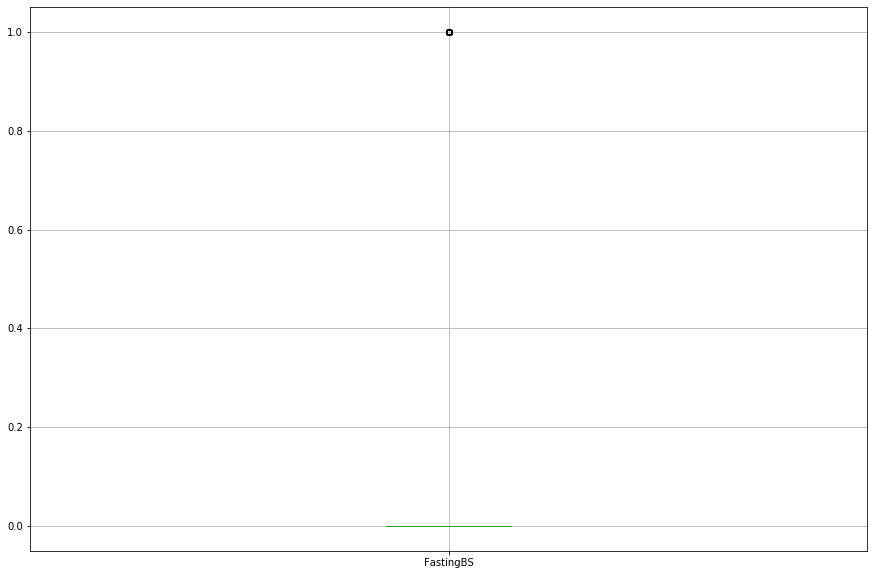

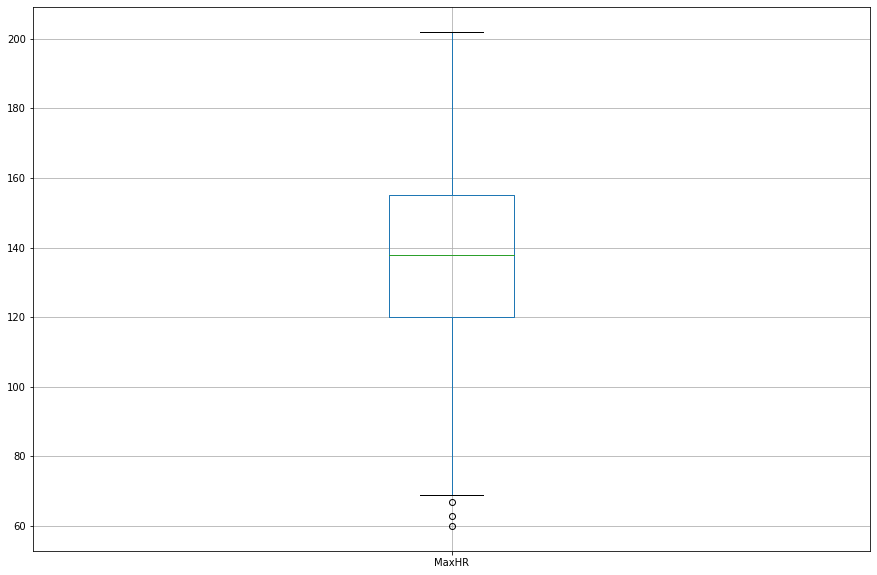

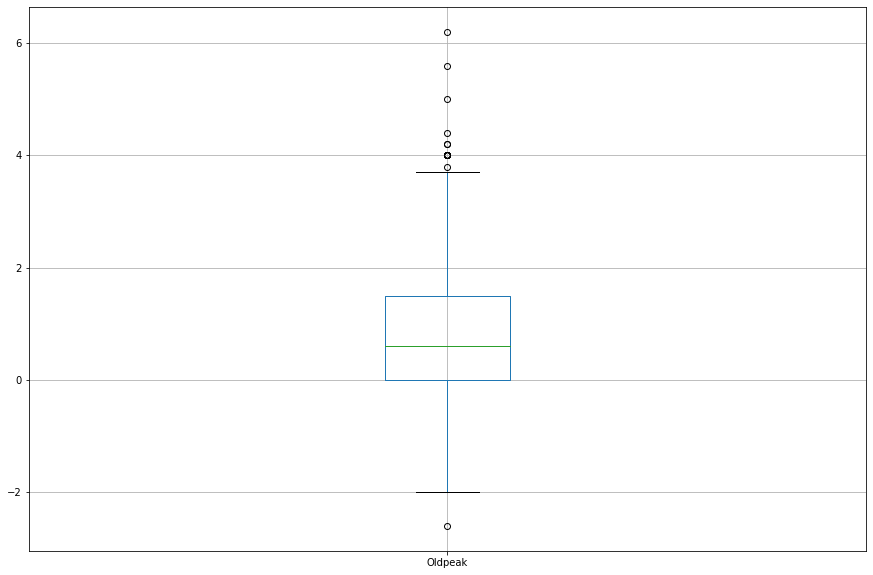

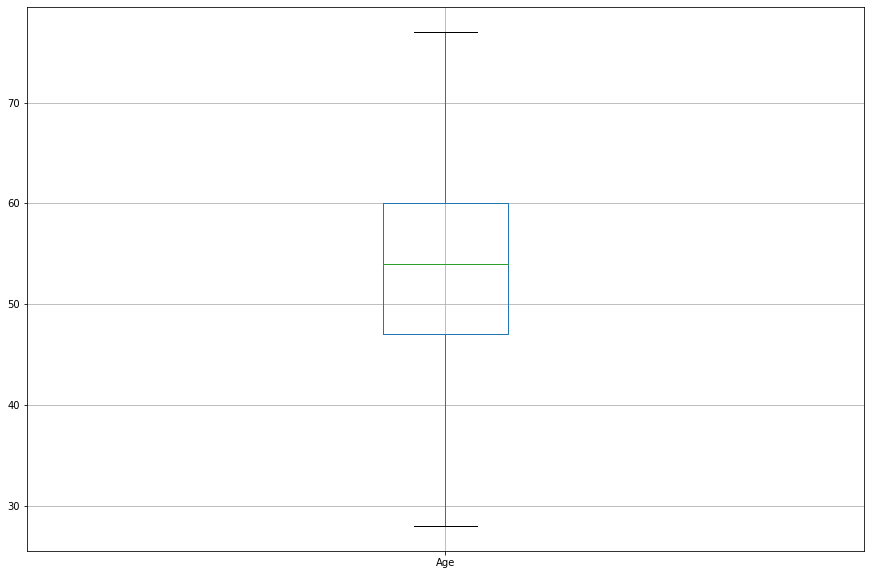

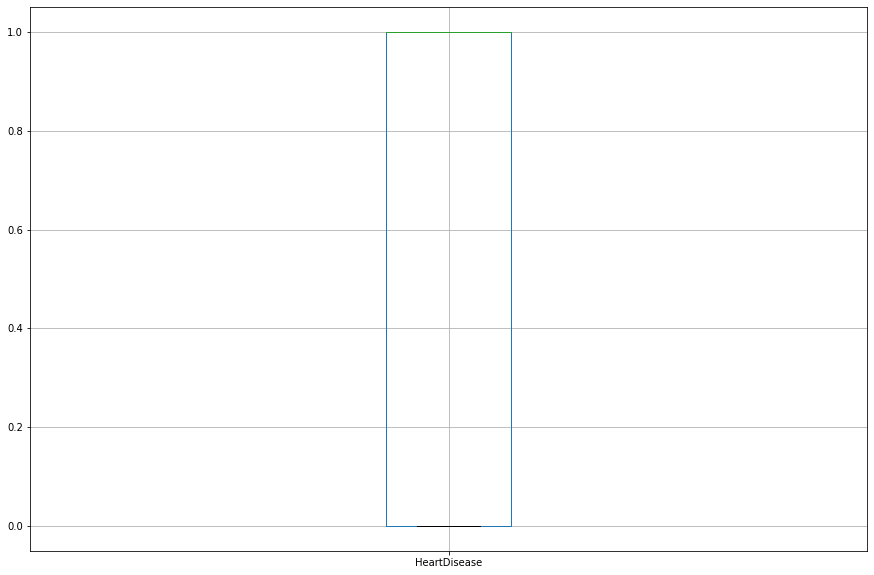

In [174]:
for column in df_ml_num:
    plt.figure()
    df_ml_num.boxplot([column])

## feature engineering

In [175]:
df_ml.dtypes[df_ml.dtypes != "object"].index

Index(['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Age',
       'HeartDisease'],
      dtype='object')

In [176]:
df_ml.dtypes[df_ml.dtypes == "object"].index

Index(['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex'], dtype='object')

In [177]:
numerical = ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Age']

In [178]:
categorical = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex']

In [179]:
check_for_heartdisease_correlation = pd.concat([X_train, y_train], axis=1)

In [180]:
check_for_heartdisease_correlation

,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,Sex,HeartDisease
410,ASY,150.0,215,0,Normal,140.0,Y,0.0,Up,50,M,0
669,ASY,139.0,170,0,ST,120.0,Y,3.0,Flat,62,M,1
696,ASY,128.0,223,0,ST,119.0,Y,2.0,Down,56,M,1
383,ASY,112.0,204,0,Normal,143.0,N,0.1,Up,47,M,0
788,ASY,110.0,198,0,Normal,138.0,N,0.0,Flat,58,M,1
337,ASY,104.0,208,0,LVH,148.0,Y,3.0,Flat,45,M,0
127,NAP,125.0,245,1,LVH,166.0,N,2.4,Flat,51,M,0
316,TA,110.0,249,0,Normal,150.0,N,0.0,Up,47,M,0
524,ASY,160.0,123,1,LVH,130.0,N,1.5,Flat,72,M,1
119,NAP,130.0,214,0,LVH,168.0,N,2.0,Flat,41,M,0


In [181]:
## check for featuers that could add value to sold amount 
strong_features_for_heartdisease = check_for_heartdisease_correlation.corrwith(check_for_heartdisease_correlation["HeartDisease"]).to_frame('coef').reset_index()

In [182]:
strong_features_for_heartdisease

,index,coef
0,RestingBP,0.110436
1,Cholesterol,-0.188411
2,FastingBS,0.281104
3,MaxHR,-0.411445
4,Oldpeak,0.415546
5,Age,0.294840
6,HeartDisease,1.000000


In [183]:
# numierical collinearity

In [184]:
X_train_corr_check = X_train[numerical]

In [185]:
# Create correlation matrix
X_train_corr_matrix_num = X_train_corr_check.corr().abs()

# Select upper triangle of correlation matrix
upper_num = X_train_corr_matrix_num.where(np.triu(np.ones(X_train_corr_matrix_num.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.75
to_drop_num = [column for column in upper_num.columns if any(upper_num[column] > 0.75)]

C:\Users\Ruthraganapathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [186]:
to_drop_num

[]

In [187]:
# categorical collinearity

In [188]:
X_train_corr_check = X_train[categorical]

In [189]:
X_train_corr_check.head()

,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Sex
410,ASY,Normal,Y,Up,M
669,ASY,ST,Y,Flat,M
696,ASY,ST,Y,Down,M
383,ASY,Normal,N,Up,M
788,ASY,Normal,N,Flat,M


In [190]:
## drop first as its binary
df_ml_new_cat_binary = pd.get_dummies(X_train_corr_check[['ExerciseAngina' ,'Sex']], drop_first=True)

In [191]:
df_ml_new_cat_multi = pd.get_dummies(X_train_corr_check[['ChestPainType', 'RestingECG', 
                                                         'ST_Slope']], drop_first=False)

In [192]:
df_ml_new_cat_multi.head()

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
410,1,0,0,0,0,1,0,0,0,1
669,1,0,0,0,0,0,1,0,1,0
696,1,0,0,0,0,0,1,1,0,0
383,1,0,0,0,0,1,0,0,0,1
788,1,0,0,0,0,1,0,0,1,0


In [193]:
cat_correlation_tr = pd.concat([df_ml_new_cat_binary, df_ml_new_cat_multi], axis=1)

In [194]:
# Create correlation matrix
corr_matrix_cat = cat_correlation_tr.corr().abs()

# Select upper triangle of correlation matrix
upper_cat = corr_matrix_cat.where(np.triu(np.ones(corr_matrix_cat.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.75
to_drop_cat = [column for column in upper_cat.columns if any(upper_cat[column] > 0.75)]

C:\Users\Ruthraganapathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [195]:
to_drop_cat

['ST_Slope_Up']

In [196]:
upper_cat

,ExerciseAngina_Y,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
ExerciseAngina_Y,NaN,0.193113,0.448185,0.308909,0.171580,0.130657,0.004986,0.085784,0.100320,0.137175,0.401591,0.469457
Sex_M,NaN,NaN,0.185136,0.168347,0.059048,0.003192,0.028783,0.053180,0.093794,0.067470,0.129245,0.162089
ChestPainType_ASY,NaN,NaN,NaN,0.532480,0.556518,0.253429,0.029370,0.091740,0.083451,0.109263,0.343144,0.397384
ChestPainType_ATA,NaN,NaN,NaN,NaN,0.262236,0.119418,0.078140,0.108415,0.055556,0.093429,0.316541,0.363103
ChestPainType_NAP,NaN,NaN,NaN,NaN,NaN,0.124809,0.014415,0.032200,0.053804,0.069605,0.089464,0.123002
ChestPainType_TA,NaN,NaN,NaN,NaN,NaN,NaN,0.047473,0.048142,0.012003,0.050907,0.034297,0.010553
RestingECG_LVH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611836,0.240743,0.052458,0.025282,0.050226
RestingECG_Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620426,0.095299,0.043762,0.089060
RestingECG_ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064925,0.028631,0.059483
ST_Slope_Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250628,0.219114


In [197]:
cat_correlation_tr.drop(to_drop_cat, inplace=True, axis=1)

In [198]:
X_train.columns

Index(['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Age', 'Sex'],
      dtype='object')

In [199]:
X_train = X_train[numerical]

In [200]:
X_train

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Age
410,150.0,215,0,140.0,0.0,50
669,139.0,170,0,120.0,3.0,62
696,128.0,223,0,119.0,2.0,56
383,112.0,204,0,143.0,0.1,47
788,110.0,198,0,138.0,0.0,58
337,104.0,208,0,148.0,3.0,45
127,125.0,245,1,166.0,2.4,51
316,110.0,249,0,150.0,0.0,47
524,160.0,123,1,130.0,1.5,72
119,130.0,214,0,168.0,2.0,41


In [201]:
X_train = pd.concat([X_train, cat_correlation_tr], axis=1)

In [202]:
X_train.head()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Age,ExerciseAngina_Y,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat
410,150.0,215,0,140.0,0.0,50,1,1,1,0,0,0,0,1,0,0,0
669,139.0,170,0,120.0,3.0,62,1,1,1,0,0,0,0,0,1,0,1
696,128.0,223,0,119.0,2.0,56,1,1,1,0,0,0,0,0,1,1,0
383,112.0,204,0,143.0,0.1,47,0,1,1,0,0,0,0,1,0,0,0
788,110.0,198,0,138.0,0.0,58,0,1,1,0,0,0,0,1,0,0,1


In [203]:
X_test_corr_check = X_test[categorical]

In [204]:
X_test_corr_check.head()

,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Sex
353,NAP,Normal,Y,Flat,M
40,NAP,Normal,N,Up,M
596,ASY,Normal,Y,Flat,M
266,ASY,Normal,Y,Flat,F
814,ASY,Normal,Y,Flat,M


In [205]:
## drop first as its binary
df_ml_new_cat_binary = pd.get_dummies(X_test_corr_check[['ExerciseAngina' ,'Sex']], drop_first=True)

In [206]:
df_ml_new_cat_multi = pd.get_dummies(X_test_corr_check[['ChestPainType', 'RestingECG', 'ST_Slope']], drop_first=False)

In [207]:
cat_correlation_te = pd.concat([df_ml_new_cat_binary, df_ml_new_cat_multi], axis=1)

In [214]:
cat_correlation_te.drop(to_drop_cat, inplace=True, axis=1)

In [215]:
X_test

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Age,ExerciseAngina_Y,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
353,140.0,193,0,145.0,1.0,47,1,1,0,0,1,0,0,1,0,0,1,0
40,112.0,250,0,179.0,0.0,41,0,1,0,0,1,0,0,1,0,0,0,1
596,150.0,213,1,125.0,1.0,56,1,1,1,0,0,0,0,1,0,0,1,0
266,138.0,243,0,152.0,0.0,46,1,0,1,0,0,0,0,1,0,0,1,0
814,150.0,0,0,105.0,0.0,61,1,1,1,0,0,0,0,1,0,0,1,0
264,138.0,220,0,152.0,0.0,39,0,0,0,0,1,0,0,1,0,0,1,0
502,140.0,313,0,133.0,0.2,64,0,0,0,0,1,0,0,1,0,0,0,1
413,140.0,169,0,140.0,0.0,59,0,1,1,0,0,0,0,1,0,0,0,1
79,140.0,289,0,172.0,0.0,40,0,1,0,1,0,0,0,1,0,0,0,1
301,130.0,256,1,150.0,0.0,48,1,1,1,0,0,0,1,0,0,0,0,1


In [216]:
X_test = X_test[numerical]

In [217]:
X_test.head()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Age
353,140.0,193,0,145.0,1.0,47
40,112.0,250,0,179.0,0.0,41
596,150.0,213,1,125.0,1.0,56
266,138.0,243,0,152.0,0.0,46
814,150.0,0,0,105.0,0.0,61


In [218]:
X_test = pd.concat([X_test, cat_correlation_te], axis=1)

In [219]:
X_test

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Age,ExerciseAngina_Y,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat
353,140.0,193,0,145.0,1.0,47,1,1,0,0,1,0,0,1,0,0,1
40,112.0,250,0,179.0,0.0,41,0,1,0,0,1,0,0,1,0,0,0
596,150.0,213,1,125.0,1.0,56,1,1,1,0,0,0,0,1,0,0,1
266,138.0,243,0,152.0,0.0,46,1,0,1,0,0,0,0,1,0,0,1
814,150.0,0,0,105.0,0.0,61,1,1,1,0,0,0,0,1,0,0,1
264,138.0,220,0,152.0,0.0,39,0,0,0,0,1,0,0,1,0,0,1
502,140.0,313,0,133.0,0.2,64,0,0,0,0,1,0,0,1,0,0,0
413,140.0,169,0,140.0,0.0,59,0,1,1,0,0,0,0,1,0,0,0
79,140.0,289,0,172.0,0.0,40,0,1,0,1,0,0,0,1,0,0,0
301,130.0,256,1,150.0,0.0,48,1,1,1,0,0,0,1,0,0,0,0


In [220]:
print (X_train.shape)
print (X_test.shape)

(688, 17)
(230, 17)


In [221]:
# Create correlation matrix
corr_matrix_final = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper_cat = corr_matrix_final.where(np.triu(np.ones(corr_matrix_final.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.75
to_drop_final = [column for column in upper_cat.columns if any(upper_cat[column] > 0.75)]

C:\Users\Ruthraganapathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [222]:
to_drop_final

[]

## logistic regression

In [223]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Ruthraganapathy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [224]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test test is : %0.3f" %acc)

F1-Score on test data is : 0.876
Area under ROC on test data is : 0.849
Accuracy on test test is : 0.857


In [225]:
confusion_matrix(y_test, clf.predict(X_test))

array([[ 80,  23],
       [ 10, 117]], dtype=int64)

In [226]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       103
           1       0.84      0.92      0.88       127

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



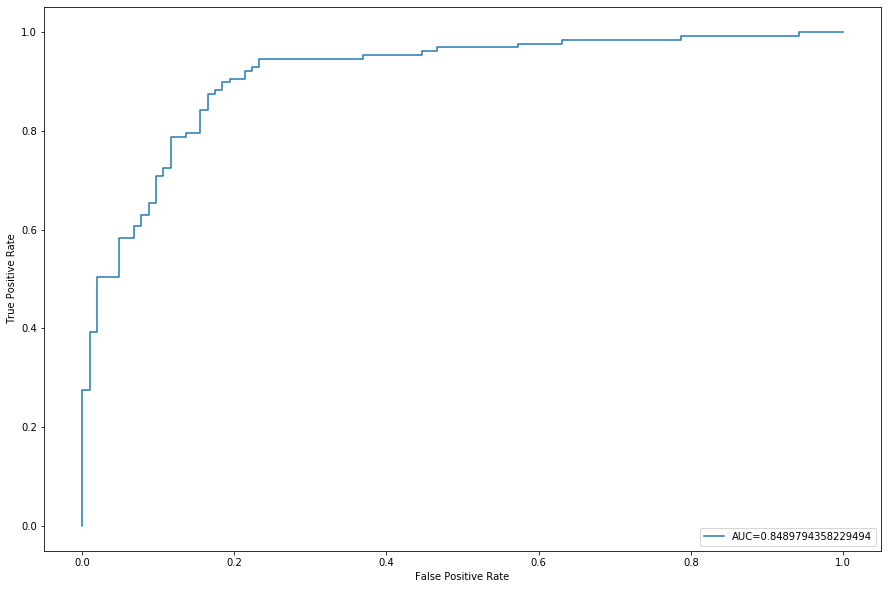

In [227]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [228]:
## check for overfitting
f1 = f1_score(y_train, clf.predict(X_train))
auc = roc_auc_score(y_train, clf.predict(X_train))
acc = accuracy_score(y_train, clf.predict(X_train))

print("F1-Score on train data is : %0.3f" %f1)
print("Area under ROC on train data is : %0.3f" %auc)
print("Accuracy on train data is : %0.3f" %acc)

F1-Score on train data is : 0.883
Area under ROC on train data is : 0.866
Accuracy on train data is : 0.869


## Xgboost

In [229]:
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [230]:
f1 = f1_score(y_test, clf_gbc.predict(X_test))
auc = roc_auc_score(y_test, clf_gbc.predict(X_test))
acc = accuracy_score(y_test, clf_gbc.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

F1-Score on test data is : 0.885
Area under ROC on test data is : 0.864
Accuracy on test data is : 0.870


In [231]:
confusion_matrix(y_test, clf_gbc.predict(X_test))

array([[ 84,  19],
       [ 11, 116]], dtype=int64)

In [232]:
print (classification_report(y_test, clf_gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       103
           1       0.86      0.91      0.89       127

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.87       230
weighted avg       0.87      0.87      0.87       230



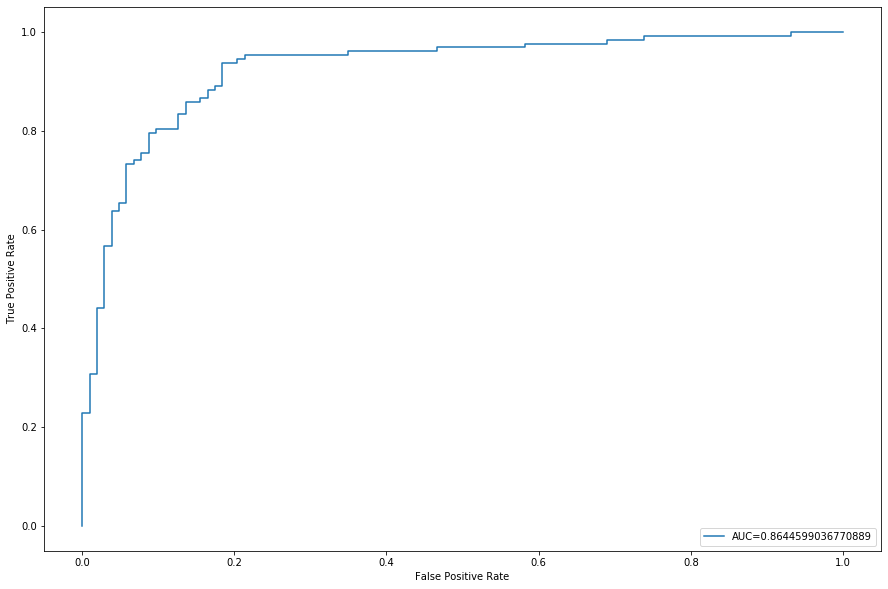

In [233]:
y_pred_proba = clf_gbc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [234]:
## check if there is overfitting
f1 = f1_score(y_train, clf_gbc.predict(X_train))
auc = roc_auc_score(y_train, clf_gbc.predict(X_train))
acc = accuracy_score(y_train, clf_gbc.predict(X_train))

print("F1-Score on train data is : %0.3f" %f1)
print("Area under ROC on train data is : %0.3f" %auc)
print("Accuracy on train data is : %0.3f" %acc)

F1-Score on train data is : 0.957
Area under ROC on train data is : 0.950
Accuracy on train data is : 0.952


In [236]:
from tabulate import tabulate

In [237]:
print(tabulate({'Model': ['Logistic Regression', 'XGboost'], 'F1_score_test': [0.876, 0.885], 'F1_score_train': [0.883, 0.957]}, headers="keys", tablefmt='fancy_grid'))

╒═════════════════════╤═════════════════╤══════════════════╕
│ Model               │   F1_score_test │   F1_score_train │
╞═════════════════════╪═════════════════╪══════════════════╡
│ Logistic Regression │           0.876 │            0.883 │
├─────────────────────┼─────────────────┼──────────────────┤
│ XGboost             │           0.885 │            0.957 │
╘═════════════════════╧═════════════════╧══════════════════╛


## txt question

In [262]:
df_txt_file = pd.read_csv("Text to table assessment 2.txt", sep='\t')

In [266]:
df_txt_file.head()

,'UserID','Age','Address','Status','Financial Rating','Education Rating'
0,1,25.0,'Puchong','Single',2.0,3.0
1,3,45.0,'Gombak','Married',4.0,4.0
2,7,67.0,'Semenyih','Single',5.0,2.0
3,9,15.0,'Nilai','Single',1.0,1.0
4,12,32.0,'Klang','Married',3.0,4.0
